# Обработка текста

Примеры задач:
1. Изменение текста (т9, обход антиплагиата)
2. Нейросети (поисковик, ассистенты)
3. Переводчики
4. тональность (положительный или отрицательный отзыв)
5. классификация

инструменты:
1. Нейросети (трансформеры)
2. Большой набор данных (датасет)
3. мощность (gpu)
4. Использовать готовое (Tensorflow, PyTorch, Hugging Face https://huggingface.co/)

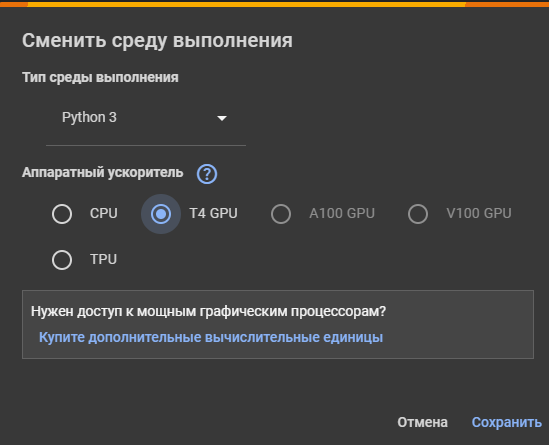

In [1]:
# !pip install transformers sentencepiece sacremoses

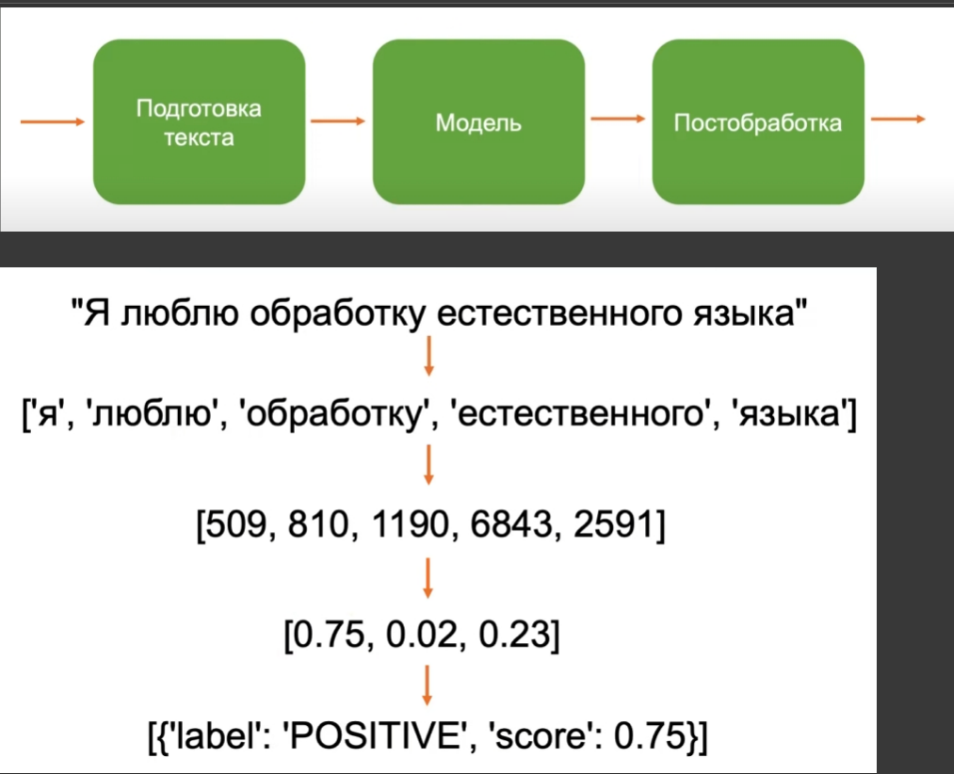

Этапы обработки:

1.   Подготовка текста: токенизация, цифровое представление
2.   Выбор нейросети
3.   Выбор оптимального решения




Сложности:

1.   Грамматика, неправильно написанное слово, сокращение, падежи, склонения, порядок
2.   Многозначность



# Токенизация текста

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User345\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
sentence = """At eight o'clock on Thursday morning ... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 '...',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

# Морфологический анализ

In [4]:
# !pip install pymorphy2

In [5]:
import pymorphy2

In [6]:
morph = pymorphy2.MorphAnalyzer()

In [7]:
morph.parse('убивал')

[Parse(word='убивал', tag=OpencorporaTag('VERB,impf,tran masc,sing,past,indc'), normal_form='убивать', score=1.0, methods_stack=((DictionaryAnalyzer(), 'убивал', 215, 7),))]

In [8]:
# !pip install pymorphy3

In [9]:
import pandas as pd
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User345\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Загрузка данных

In [11]:
# !wget https://www.dropbox.com/s/a9r0b2yj3vqvi13/banks.csv?dl=1 -O banks.csv

In [12]:
# !head banks.csv

Файл загружен, его необходимо преобразовать в фатафрейм

In [13]:
df = pd.read_csv('twitter_training.csv')
df

,count,Game,Status,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [14]:
df['Text'] = df['Text'].astype("str")

# Токенизация

In [15]:
text = df.iloc[0]['Text']
text

'I am coming to the borders and I will kill you all,'

In [16]:
tokens = nltk.word_tokenize(text.lower())
tokens

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all',
 ',']

# Фильтрация знаков препинания

In [17]:
prepiv = [',', '.','!','?','-','..',':','...','(',')',]

In [18]:
without_prepiv = []
for token in tokens:
  if token not in prepiv:
    without_prepiv.append(token)

without_prepiv

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

# Нормальная форма слова

In [19]:
morph = pymorphy3.MorphAnalyzer()

In [20]:
normal = []

for word in without_prepiv:
  normal.append(morph.parse(word)[0].normal_form)

normal

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

# Удаление служебных частей речи

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User345\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
engstop = stopwords.words('english')
engstop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
without_stop = []

for word in normal:
  if word not in engstop:
    without_stop.append(word)

without_stop

['coming', 'borders', 'kill']

# Предобработка


До этого мы все этапы прошли на одном отзыве. Теперь нужно применить на всей таблице. Для этого наши пошаговые действия добавим в 1 функцию

In [24]:
def preprocess(text, russtop, prepiv, normal):
  tokens = nltk.word_tokenize(text.lower())
  preprocess_text = []
  for token in tokens:
    if token not in prepiv:
      loc_normal = morph.parse(token)[0].normal_form
      if loc_normal not in russtop:
        preprocess_text.append(loc_normal)

  return preprocess_text

In [25]:
prepiv = [',', '.','!','?','-','..',':','...','(',')',]
morph = pymorphy3.MorphAnalyzer()
russtop = stopwords.words('russian')

In [26]:
df[0:5].apply( lambda row: preprocess(row['Text'], russtop, prepiv, normal), axis=1)

0    [i, am, coming, to, the, borders, and, i, will...
1    [im, getting, on, borderlands, and, i, will, k...
2    [im, coming, on, borderlands, and, i, will, mu...
3    [im, getting, on, borderlands, 2, and, i, will...
4    [im, getting, into, borderlands, and, i, can, ...
dtype: object

In [27]:
df['preprocess_text'] = df.apply( lambda row: preprocess(row['Text'], russtop, prepiv, normal), axis=1)

In [28]:
df = df[:1000]

# Векторизация

In [29]:
%time
print("Время выполнения")

CPU times: total: 0 ns
Wall time: 0 ns
Время выполнения


In [30]:
from collections import Counter

In [31]:
%time
test_Counter= Counter(df["preprocess_text"][0])
test_Counter

CPU times: total: 0 ns
Wall time: 0 ns


Counter({'i': 2,
         'am': 1,
         'coming': 1,
         'to': 1,
         'the': 1,
         'borders': 1,
         'and': 1,
         'will': 1,
         'kill': 1,
         'you': 1,
         'all': 1})

In [32]:
test_Counter.most_common(10)

[('i', 2),
 ('am', 1),
 ('coming', 1),
 ('to', 1),
 ('the', 1),
 ('borders', 1),
 ('and', 1),
 ('will', 1),
 ('kill', 1),
 ('you', 1)]

In [33]:
word_Counter = Counter ()

In [34]:
for odz in df["preprocess_text"]:
  word_Counter.update(odz)

In [35]:
aboba = word_Counter.most_common(len(word_Counter))

aboba

[('i', 737),
 ('the', 694),
 ('borderlands', 675),
 ('and', 471),
 ('to', 468),
 ('@', 419),
 ('a', 405),
 ('is', 300),
 ('of', 262),
 ('3', 253),
 ('it', 242),
 ('for', 237),
 ('this', 232),
 ('my', 231),
 ('you', 206),
 ('on', 199),
 ('in', 198),
 ('that', 173),
 ('so', 165),
 ('with', 147),
 ('all', 138),
 ('have', 137),
 ('/', 129),
 ('but', 126),
 ('was', 108),
 ('game', 106),
 ('love', 101),
 ('2', 97),
 ("n't", 97),
 ('like', 97),
 ('me', 95),
 ('just', 94),
 ('be', 89),
 ('do', 88),
 ('are', 87),
 ('play', 87),
 ('as', 85),
 ("'m", 81),
 ("'s", 80),
 ('out', 79),
 ('we', 73),
 ('some', 72),
 ('fun', 69),
 ('from', 69),
 ('’', 69),
 ('really', 67),
 ('playing', 66),
 ('games', 65),
 ('been', 65),
 ('can', 61),
 ('if', 61),
 ('now', 60),
 ('new', 59),
 ('what', 59),
 ('thank', 57),
 ('get', 57),
 ('more', 57),
 ('had', 56),
 ('not', 56),
 ('who', 56),
 ('dlc', 53),
 ('one', 50),
 ('good', 50),
 ('stream', 49),
 ('up', 49),
 ('even', 48),
 ('today', 47),
 ('also', 47),
 ('favorite

# Cортируем слова по частоте

In [36]:
otsort = dict() # создание пустого словаря
for i in range(len(aboba)):
  otsort[aboba[i][0]] = aboba[i][1]

numeration = dict()
for i in range(len(aboba)):
  numeration[i] = aboba[i][0]

numeration_test = dict()
for i in range(len(aboba)):
  numeration_test[numeration[i]] = i

numeration_test

{'i': 0,
 'the': 1,
 'borderlands': 2,
 'and': 3,
 'to': 4,
 '@': 5,
 'a': 6,
 'is': 7,
 'of': 8,
 '3': 9,
 'it': 10,
 'for': 11,
 'this': 12,
 'my': 13,
 'you': 14,
 'on': 15,
 'in': 16,
 'that': 17,
 'so': 18,
 'with': 19,
 'all': 20,
 'have': 21,
 '/': 22,
 'but': 23,
 'was': 24,
 'game': 25,
 'love': 26,
 '2': 27,
 "n't": 28,
 'like': 29,
 'me': 30,
 'just': 31,
 'be': 32,
 'do': 33,
 'are': 34,
 'play': 35,
 'as': 36,
 "'m": 37,
 "'s": 38,
 'out': 39,
 'we': 40,
 'some': 41,
 'fun': 42,
 'from': 43,
 '’': 44,
 'really': 45,
 'playing': 46,
 'games': 47,
 'been': 48,
 'can': 49,
 'if': 50,
 'now': 51,
 'new': 52,
 'what': 53,
 'thank': 54,
 'get': 55,
 'more': 56,
 'had': 57,
 'not': 58,
 'who': 59,
 'dlc': 60,
 'one': 61,
 'good': 62,
 'stream': 63,
 'up': 64,
 'even': 65,
 'today': 66,
 'also': 67,
 'favorite': 68,
 'here': 69,
 'see': 70,
 'gearboxofficial': 71,
 'would': 72,
 'at': 73,
 'very': 74,
 'how': 75,
 'work': 76,
 'best': 77,
 'time': 78,
 'unk': 79,
 'probably': 80,


In [37]:
type(numeration)

dict

In [38]:
%time
def func_test(numeration_test,text):
  preprocess_text = []

  for i in text:
    a = numeration_test.get(i, 1)
    preprocess_text.append(a)

  return preprocess_text
df["frequency"] = df.apply(lambda row: func_test(numeration_test,  row["preprocess_text"]) , axis = 1)
df

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\User345\AppData\Local\Temp\ipykernel_12844\1303818575.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["frequency"] = df.apply(lambda row: func_test(numeration_test,  row["preprocess_text"]) , axis = 1)


,count,Game,Status,Text,preprocess_text,frequency
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[i, am, coming, to, the, borders, and, i, will...","[0, 82, 250, 4, 1, 1489, 3, 0, 100, 405, 14, 20]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, on, borderlands, and, i, will, k...","[107, 237, 15, 2, 3, 0, 100, 405, 14, 20]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...","[107, 250, 15, 2, 3, 0, 100, 406, 14, 20]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, 2, and, i, will...","[107, 237, 15, 2, 27, 3, 0, 100, 406, 14, 30, 20]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, into, borderlands, and, i, can, ...","[107, 237, 176, 2, 3, 0, 49, 406, 14, 20]"
...,...,...,...,...,...,...
995,2577,Borderlands,Positive,Who's down for some @Borderlands on,"[who, 's, down, for, some, @, borderlands, on]","[59, 38, 258, 11, 41, 5, 2, 15]"
996,2577,Borderlands,Positive,Who's on for some @ Borderlands,"[who, 's, on, for, some, @, borderlands]","[59, 38, 15, 11, 41, 5, 2]"
997,2577,Borderlands,Positive,Who's at @ Borderlands,"[who, 's, at, @, borderlands]","[59, 38, 73, 5, 2]"
998,2577,Borderlands,Positive,Who's down with some @Borderlands on,"[who, 's, down, with, some, @, borderlands, on]","[59, 38, 258, 19, 41, 5, 2, 15]"


In [39]:
len(df["frequency"])

1000

# Цифры в веса

In [40]:
%time
import numpy as np
def vesa(frequency):

  preprocess_text = np.zeros((1000,1000*1000))

  for i, frequency  in enumerate(frequency):
    for g in frequency:
      preprocess_text[i, g] += 1.

  return preprocess_text

frequency = vesa(df["frequency"])
frequency

CPU times: total: 0 ns
Wall time: 0 ns


array([[2., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# Word2Vec

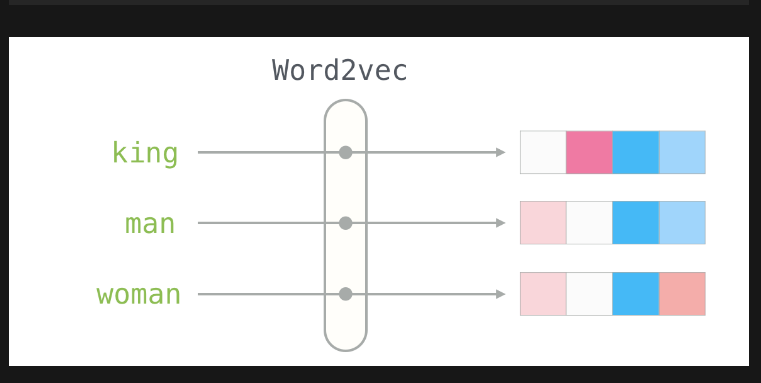

https://habr.com/ru/articles/446530/

In [41]:
import gensim.models

In [42]:
model = gensim.models.Word2Vec(sentences=df['preprocess_text'],
                              min_count=5,
                              vector_size=100)

In [44]:
model.wv['coming']

array([-0.02955452,  0.05805663, -0.05438967,  0.01131666,  0.05163886,
       -0.16194475,  0.063198  ,  0.2125828 , -0.08150271, -0.09296031,
       -0.07264455, -0.12445827, -0.0143811 ,  0.0466135 ,  0.03869271,
       -0.04735171, -0.02009817, -0.06857229, -0.06415984, -0.19857568,
        0.06095618,  0.02887534,  0.0495098 , -0.05603604, -0.02236708,
       -0.02320543, -0.05816014, -0.03277935, -0.04774271, -0.07046434,
        0.12258229, -0.03706625,  0.0900338 , -0.03549866, -0.03637621,
        0.1095925 ,  0.02748113, -0.09021616, -0.13122216, -0.20190291,
       -0.03827507, -0.11027803, -0.04317668,  0.03594565,  0.04354296,
       -0.00823521, -0.02325547,  0.01678447,  0.02902169,  0.07445388,
        0.03678088, -0.08633742,  0.03439347, -0.00871341, -0.07266426,
        0.09128593,  0.08002917,  0.0148138 , -0.07657655,  0.02667692,
        0.10016361,  0.04338497,  0.0268979 , -0.05776453, -0.1243736 ,
        0.14251332,  0.0273797 ,  0.10173352, -0.14571443,  0.14

In [45]:
model.wv['kill']

array([-0.01328153,  0.02387806, -0.03096826,  0.00886197,  0.02936418,
       -0.10442719,  0.03801462,  0.13289972, -0.06322215, -0.06096675,
       -0.04687566, -0.08893649, -0.0169029 ,  0.03715605,  0.0170196 ,
       -0.03094535, -0.02049418, -0.04375605, -0.03268667, -0.13127552,
        0.03418126,  0.02378268,  0.03062296, -0.04592462, -0.0042042 ,
       -0.01297371, -0.0424752 , -0.02720887, -0.04810319, -0.04441474,
        0.07312509, -0.02118669,  0.06202205, -0.01209687, -0.02943247,
        0.06853458,  0.03076995, -0.06441938, -0.08472393, -0.1351618 ,
       -0.01025563, -0.08268145, -0.01986081,  0.01661413,  0.02610778,
       -0.00437588, -0.02432577,  0.01026949,  0.01766452,  0.03821092,
        0.02024113, -0.072174  ,  0.01665825, -0.00022767, -0.05038674,
        0.05391283,  0.05610954,  0.00830878, -0.04634033,  0.0101518 ,
        0.07775257,  0.01892998,  0.01203443, -0.0422897 , -0.08917163,
        0.09213706,  0.02951359,  0.05672431, -0.106406  ,  0.09

In [47]:
model.wv.most_similar('first')

[('and', 0.9993237853050232),
 ('of', 0.9993231296539307),
 ('it', 0.9993157982826233),
 ('to', 0.9993062615394592),
 ('this', 0.9993025064468384),
 ('are', 0.9992661476135254),
 ('on', 0.9992569088935852),
 ('a', 0.9992546439170837),
 ('as', 0.9992485046386719),
 ('have', 0.999243438243866)]

In [48]:
model.wv.most_similar('week')

[('year', 0.9926002025604248),
 ('still', 0.992573618888855),
 ('my', 0.9925188422203064),
 ('started', 0.9925063252449036),
 ('stream', 0.9925000071525574),
 ('when', 0.992495059967041),
 ('what', 0.9924663305282593),
 ('forever', 0.9924570322036743),
 ('so', 0.9924486875534058),
 ('here', 0.9924456477165222)]

# Сохраняем обученную модель

In [49]:
model.save('word2vec-banki.ru-50')

In [50]:
!ls -lh

"ls" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


# Загрузка сохраненной модели

In [51]:
new_model = gensim.models.Word2Vec.load('word2vec-banki.ru-50')

In [53]:
new_model.wv['work']

array([-0.09462557,  0.13103555, -0.15776344,  0.00395951,  0.1520297 ,
       -0.43788943,  0.16765358,  0.5319933 , -0.22159047, -0.23387372,
       -0.19337788, -0.32226622, -0.04585633,  0.11734801,  0.09891789,
       -0.13221416, -0.05348398, -0.17133243, -0.14861098, -0.53978497,
        0.17154445,  0.0874806 ,  0.12771201, -0.16652739, -0.04398378,
       -0.05744257, -0.14956681, -0.06956866, -0.14046802, -0.17654735,
        0.30527973, -0.09649809,  0.20861982, -0.07125042, -0.07380538,
        0.26052076,  0.08323228, -0.22666208, -0.35376808, -0.5255814 ,
       -0.0836546 , -0.3101716 , -0.08935954,  0.08644528,  0.10097633,
       -0.03407744, -0.07216118,  0.01413257,  0.09125668,  0.17801784,
        0.08470028, -0.23994659,  0.08343983, -0.03528797, -0.16081722,
        0.21976176,  0.21106263,  0.03710756, -0.21069182,  0.08455023,
        0.27117267,  0.08103886,  0.08020539, -0.1545515 , -0.30469388,
        0.37947837,  0.07482854,  0.24418488, -0.36848888,  0.37

# Определение тональности отзывов на банки с помощью классических алгоритмов машинного обучения

Используем логистическую регрессию и мешок слов.

In [ ]:
# !pip install pymorphy3

In [54]:
import pandas as pd
import numpy as np
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter

In [55]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User345\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User345\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Константы

In [56]:
max_words = 10000
random_state = 42

# Загружаем и готовим набор данных

In [ ]:
# !wget https://www.dropbox.com/s/a9r0b2yj3vqvi13/banks.csv?dl=1 -O banks.csv

In [63]:
banks = pd.read_csv('twitter_training.csv');
banks['Text'] = banks['Text'].astype("str")

In [64]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [65]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--']
stop_words = stopwords.words("english")
morph = pymorphy3.MorphAnalyzer()

In [66]:
banks['Preprocessed_texts'] = banks.apply(lambda row: preprocess(row['Text'], punctuation_marks, stop_words, morph), axis=1)

In [67]:
banks

,count,Game,Status,Text,Preprocessed_texts
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[coming, borders, kill]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,"[realized, windows, partition, mac, like, 6, y..."
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,"[realized, mac, window, partition, 6, years, b..."
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,"[realized, windows, partition, mac, 6, years, ..."
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,"[realized, windows, partition, mac, like, 6, y..."




Считаем частоту слов во всех отзывах


In [68]:
words = Counter()

In [69]:
for txt in banks['Preprocessed_texts']:
    words.update(txt)



Создаем словарь, упорядоченный по частоте

В словаре будем использовать 2 специальных кода:

    Код заполнитель: 0
    Неизвестное слово: 1

Нумерация слов в словаре начинается с 2.


In [70]:
# Словарь, отображающий слова в коды
word_to_index = dict()
# Словарь, отображающий коды в слова
index_to_word = dict()

Создаем словари

In [71]:
for i, word in enumerate(words.most_common(max_words - 2)):
    word_to_index[word[0]] = i + 2
    index_to_word[i + 2] = word[0]

Функция для преобразования списка слов в список кодов

In [72]:
def text_to_sequence(txt, word_to_index):
    seq = []
    for word in txt:
        index = word_to_index.get(word, 1) # 1 означает неизвестное слово
        # Неизвестные слова не добавляем в выходную последовательность
        if index != 1:
            seq.append(index)
    return seq

Преобразуем все тексты в последовательность кодов слов

In [73]:
banks['Sequences'] = banks.apply(lambda row: text_to_sequence(row['Preprocessed_texts'], word_to_index), axis=1)

In [74]:
banks

,count,Game,Status,Text,Preprocessed_texts,Sequences
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[coming, borders, kill]","[304, 6421, 331]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]","[213, 100, 72, 331]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]","[213, 304, 72, 1611]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]","[213, 100, 72, 10, 1611]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]","[213, 100, 72, 1611]"
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,"[realized, windows, partition, mac, like, 6, y...","[1787, 514, 1981, 8, 256, 132, 666, 69, 1197, ..."
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,"[realized, mac, window, partition, 6, years, b...","[1787, 1981, 4304, 256, 132, 666, 69, 1197, 42..."
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,"[realized, windows, partition, mac, 6, years, ...","[1787, 514, 1981, 256, 132, 666, 69, 1197, 420..."
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,"[realized, windows, partition, mac, like, 6, y...","[1787, 514, 1981, 8, 256, 132, 666, 69, 1197, ..."


# Готовим данные для обучения

Преобразуем текстовые метки классов в числовые

In [75]:
mapping = {'Negative': 0, 'Positive': 1}

In [76]:
banks.replace({'Score': mapping}, inplace=True)

In [77]:
banks

,count,Game,Status,Text,Preprocessed_texts,Sequences
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[coming, borders, kill]","[304, 6421, 331]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]","[213, 100, 72, 331]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]","[213, 304, 72, 1611]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]","[213, 100, 72, 10, 1611]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]","[213, 100, 72, 1611]"
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,"[realized, windows, partition, mac, like, 6, y...","[1787, 514, 1981, 8, 256, 132, 666, 69, 1197, ..."
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,"[realized, mac, window, partition, 6, years, b...","[1787, 1981, 4304, 256, 132, 666, 69, 1197, 42..."
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,"[realized, windows, partition, mac, 6, years, ...","[1787, 514, 1981, 256, 132, 666, 69, 1197, 420..."
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,"[realized, windows, partition, mac, like, 6, y...","[1787, 514, 1981, 8, 256, 132, 666, 69, 1197, ..."


# Выделяем данные для обучения и тестирования

In [78]:
train, test = train_test_split(banks, test_size=0.2)

In [79]:
train

,count,Game,Status,Text,Preprocessed_texts,Sequences
32475,7571,LeagueOfLegends,Neutral,A KAYN FEELS TO SHAME,"[kayn, feels, shame]","[7195, 369, 1086]"
26907,1024,AssassinsCreed,Negative,could i swear mfs just be talking u out they a...,"[could, swear, mfs, talking, u, ass, bro, wtf,...","[118, 1120, 1767, 623, 137, 184, 355, 183, 417]"
53630,2016,CallOfDuty,Positive,Congrats @InfinityWard on finally getting Bitc...,"[congrats, @, infinityward, finally, getting, ...","[1165, 2, 1415, 164, 100, 5650, 464, 464, 158,..."
16152,3165,Dota2,Negative,Our game is too good to make this a reality th...,"[game, good, make, reality, contend]","[5, 12, 65, 1541]"
70171,10823,TomClancysGhostRecon,Positive,A couple of shots I took yesterday playing wit...,"[couple, shots, took, yesterday, playing, @, t...","[875, 1500, 432, 547, 40, 2, 14, 2, 14, 2, 126..."
...,...,...,...,...,...,...
66321,6957,johnson&johnson,Positive,Some other great clever nuggets of.. “ this In...,"[great, clever, nuggets, “, insight, without, ...","[38, 4248, 7037, 198, 293, 3100, 5777, 26, 205..."
45916,11881,Verizon,Negative,It’s so incumbent with customers I back down e...,"[’, incumbent, customers, back, employees, shi...","[4, 746, 52, 881, 926, 1967, 1373, 156, 746, 4..."
28496,504,ApexLegends,Positive,Excited to be competing in Chicago<unk> @LuluL...,"[excited, competing, chicago, <, unk, >, @, lu...","[168, 3219, 2917, 25, 21, 19, 2, 7168, 2, 54, 68]"
13618,8736,NBA2K,Negative,@NBA2K actually kicked me out my Rush 3v3 chan...,"[@, nba2k, actually, kicked, rush, 3v3, channe...","[2, 134, 125, 1071, 2610, 7002, 755, 139, 5, 4..."


In [80]:
test

,count,Game,Status,Text,Preprocessed_texts,Sequences
35413,8082,Microsoft,Irrelevant,If you receive an e-mail from billingment.uste...,"[receive, e-mail, billingment.ustech, @, gmail...","[1984, 5374, 2, 7753, 51, 1534, 396, 545, 87, ..."
9833,12894,Xbox(Xseries),Positive,I can’t wait to buy this nigga this Xbox X . 🥳,"[’, wait, buy, nigga, xbox, x, 🥳]","[4, 90, 153, 1208, 42, 110, 4289]"
17931,9874,PlayStation5(PS5),Negative,Fuck the PS5 And what does I gotta do for the ...,"[fuck, ps5, got, ta, xbox, x, evolution, series]","[43, 106, 30, 541, 42, 110, 5675, 95]"
67412,7145,johnson&johnson,Irrelevant,God will stop the fall.. As it is sign of raci...,"[god, stop, fall, sign, racism, cow, give, whi...","[235, 133, 899, 1013, 1387, 4724, 182, 588, 49..."
9552,12844,Xbox(Xseries),Irrelevant,This is ridiculous & I love it!,"[ridiculous, &, love]","[728, 14, 15]"
...,...,...,...,...,...,...
61833,5000,GrandTheftAuto(GTA),Irrelevant,You make something fun out of one brown boy in...,"[make, something, fun, one, brown, boy, gta, c...","[65, 149, 68, 11, 2714, 589, 75, 418, 802, 229..."
54391,2143,CallOfDuty,Neutral,There was a time when @ LandoNorris refused ev...,"[time, @, landonorris, refused, even, click, g...","[22, 2, 6030, 39, 956, 5, 6, 147, 347, 6, 2042..."
72069,11146,TomClancysGhostRecon,Negative,"Hey @Ubisoft, how about like that","[hey, @, ubisoft, like]","[233, 2, 237, 8]"
49083,6026,FIFA,Negative,This little stupid nacho is playing like FIFA ...,"[little, stupid, nacho, playing, like, fifa, p...","[245, 248, 40, 8, 55, 143]"



# Разделяем метки классов и данные для обучения


Данные для обучения

In [83]:
x_train_seq = train['Sequences']
y_train = train['Status']

In [84]:
x_train_seq

32475                                    [7195, 369, 1086]
26907      [118, 1120, 1767, 623, 137, 184, 355, 183, 417]
53630    [1165, 2, 1415, 164, 100, 5650, 464, 464, 158,...
16152                                    [5, 12, 65, 1541]
70171    [875, 1500, 432, 547, 40, 2, 14, 2, 14, 2, 126...
                               ...                        
66321    [38, 4248, 7037, 198, 293, 3100, 5777, 26, 205...
45916    [4, 746, 52, 881, 926, 1967, 1373, 156, 746, 4...
28496    [168, 3219, 2917, 25, 21, 19, 2, 7168, 2, 54, 68]
13618    [2, 134, 125, 1071, 2610, 7002, 755, 139, 5, 4...
73248    [69, 753, 6916, 8, 182, 16, 210, 2626, 27, 664...
Name: Sequences, Length: 59744, dtype: object

In [85]:
y_train

32475     Neutral
26907    Negative
53630    Positive
16152    Negative
70171    Positive
           ...   
66321    Positive
45916    Negative
28496    Positive
13618    Negative
73248    Negative
Name: Status, Length: 59744, dtype: object

In [86]:
x_test_seq = test['Sequences']
y_test = test['Status']

Данные для тестирования

In [87]:
x_test_seq

35413    [1984, 5374, 2, 7753, 51, 1534, 396, 545, 87, ...
9833                     [4, 90, 153, 1208, 42, 110, 4289]
17931                [43, 106, 30, 541, 42, 110, 5675, 95]
67412    [235, 133, 899, 1013, 1387, 4724, 182, 588, 49...
9552                                         [728, 14, 15]
                               ...                        
61833    [65, 149, 68, 11, 2714, 589, 75, 418, 802, 229...
54391    [22, 2, 6030, 39, 956, 5, 6, 147, 347, 6, 2042...
72069                                     [233, 2, 237, 8]
49083                           [245, 248, 40, 8, 55, 143]
21233                                          [142, 9286]
Name: Sequences, Length: 14937, dtype: object

In [88]:
y_test

35413    Irrelevant
9833       Positive
17931      Negative
67412    Irrelevant
9552     Irrelevant
            ...    
61833    Irrelevant
54391       Neutral
72069      Negative
49083      Negative
21233       Neutral
Name: Status, Length: 14937, dtype: object

# Создаем мешок слов

In [89]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for index in sequence:
            results[i, index] += 1.
    return results

In [90]:
x_train = vectorize_sequences(x_train_seq, max_words)

In [91]:
x_test = vectorize_sequences(x_test_seq, max_words)

In [92]:
x_train[0][:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [93]:
len(x_train[0])

10000

# Создаем модель машинного обучения

In [94]:
lr = LogisticRegression(random_state=random_state, max_iter=500)

# Обучаем модель машинного обучения

In [95]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=500, random_state=42)


# Оцениваем качество обучения на тестовом наборе данных


In [96]:
lr.score(x_test, y_test)

0.7696994041641562

# Применяем модель для определения тональности отзыва на банк

Позитивный отзыв

In [97]:
positive_text = """Rocket League, Sea of Thieves or Rainbow Six: Siege🤔? I love playing all three on stream but which is the best? #stream #twitch #RocketLeague #SeaOfThieves #RainbowSixSiege #follow"""

Подготовка текста к обработке

In [98]:
positive_preprocessed_text = preprocess(positive_text, stop_words, punctuation_marks, morph)

In [99]:
positive_preprocessed_text

['rocket',
 'league',
 'sea',
 'thieves',
 'rainbow',
 'six',
 'siege🤔',
 'love',
 'playing',
 'three',
 'stream',
 'best',
 '#',
 'stream',
 '#',
 'twitch',
 '#',
 'rocketleague',
 '#',
 'seaofthieves',
 '#',
 'rainbowsixsiege',
 '#',
 'follow']

In [100]:
positive_seq = text_to_sequence(positive_preprocessed_text, word_to_index)

In [101]:
positive_seq

[2893,
 107,
 895,
 2743,
 1271,
 1188,
 15,
 40,
 520,
 150,
 31,
 612,
 150,
 612,
 477,
 612,
 612,
 612,
 612,
 459]

In [102]:
positive_bow = vectorize_sequences([positive_seq], max_words)

In [103]:
positive_bow[0][0:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [104]:
result = lr.predict(positive_bow)

In [105]:
result

array(['Irrelevant'], dtype=object)

Негативный отзыв

In [106]:
negative_text = """Anyone that plays a bad luck albatross deck in hearthstone is a literal cop.
"""

In [107]:
negative_preprocessed_text = preprocess(negative_text, stop_words, punctuation_marks, morph)
negative_seq = text_to_sequence(negative_preprocessed_text, word_to_index)
negative_bow = vectorize_sequences([negative_seq], max_words)

In [108]:
negative_bow[0][0:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
result = lr.predict(negative_bow)

In [110]:
result

array(['Neutral'], dtype=object)

In [111]:
result = lr.predict_proba(negative_bow)

In [112]:
result

array([[0.0032521 , 0.01359489, 0.93377542, 0.04937758]])